## Least Square 
Given a dataset $\{(x_i, y_i)\}, x_i \in R^p, y_i \in R$, we want to build a linear model for regression. We use the Lease Square model.
<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;L&space;&=&space;\sum_{i}^N(y_i&space;-&space;\hat&space;y_i)^2&space;\\&space;&=&space;\frac{1}{2N}&space;\sum_{i=1}^{N}&space;(y_i&space;-&space;\sum_{j=1}^{p&plus;1}&space;{x_{ij}&space;\beta_j})^2&space;\\&space;&=&space;\frac{1}{2N}&space;||Y&space;-&space;X\beta||^2&space;\end{align*}" title="\begin{align*} L &= \sum_{i}^N(y_i - \hat y_i)^2 \\ &= \frac{1}{2N} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p+1} {x_{ij} \beta_j})^2 \\ &= \frac{1}{2N} ||Y - X\beta||^2 \end{align*}" />


## Data Generator

We use the boston house price dataset. In preprocessing, to eliminate intercepet, we expand $X$'s dim and scale each feature's mean to zero and each feature's std to unit.

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [2]:
x, y = load_boston(return_X_y=True)
m = x.shape[0]
inter = np.ones([m, 1]) # intercept
x = np.hstack((x, inter))
x.shape, y.shape

((506, 14), (506,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2018)
y_train, y_test = np.expand_dims(y_train, 1), np.expand_dims(y_test, 1)
X_train.shape, y_train.shape

((379, 14), (379, 1))

In [4]:
# Stand Normalization
x_scale = preprocessing.StandardScaler()
x_scale.fit(X_train)
X_train_, X_test_ = x_scale.transform(X_train), x_scale.transform(X_test)

y_scale = preprocessing.StandardScaler()
y_scale.fit(y_train)
y_train_, y_test_ = y_scale.transform(y_train), y_scale.transform(y_test)

## Least Square

### Closed-form Solution

Because $L$ is a convex function about $\beta$, there is a guarantee that the point where its gradient is zero is a global minimum. Thus, we can get the close-form solution.
<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;\min_{\beta}&space;L&space;\Leftrightarrow&space;\frac{\partial&space;L}{\partial&space;\beta}&space;&=&space;2X^T(X\beta&space;-&space;Y)&space;=&space;0&space;\\&space;\beta^*&space;&=&space;(X^TX)^{-1}X^TY&space;\end{align}" title="\begin{align*} \min_{\beta} L \Leftrightarrow \frac{\partial L}{\partial \beta} &= 2X^T(X\beta - Y) = 0 \\ \beta^* &= (X^TX)^{-1}X^TY \end{align}" />

In [5]:
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_train_.T, X_train_)), X_train_.T), y_train_)
beta

array([[-0.07209774],
       [ 0.11894099],
       [ 0.00445335],
       [ 0.08812723],
       [-0.23935669],
       [ 0.25977597],
       [ 0.02815424],
       [-0.35244908],
       [ 0.27334555],
       [-0.22559975],
       [-0.20973585],
       [ 0.08301262],
       [-0.45162878],
       [ 0.        ]])

('LS Train Error', 11.827758632140242)

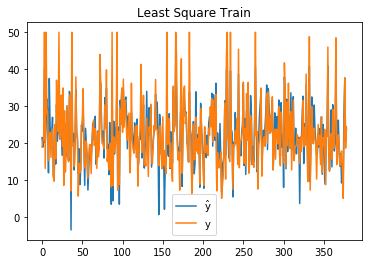

In [6]:
y_hat_train_ = np.dot(X_train_, beta)
y_hat_train = y_scale.inverse_transform(y_hat_train_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Least Square Train")
plt.legend()
train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
"LS Train Error", train_error

('LS Test Error', 8.591449508097204)

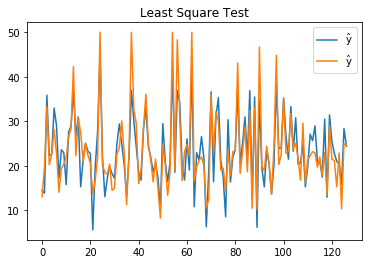

In [7]:
y_hat_test_ = np.dot(X_test_, beta)
y_hat_test = y_scale.inverse_transform(y_hat_test_)
plt.plot(y_hat_test, label="$\mathrm{\hat y}$")
plt.plot(y_test, label="$\mathrm{\hat y}$")
plt.title("Least Square Test")
plt.legend()
test_error = np.sum(np.square(y_hat_test - y_test))/(2*y_test.shape[0])
"LS Test Error", test_error

### Gradient Descent


Because close-form solution may <strong>over-fit</strong>, we can use gradient descent to gradually optimize

<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;\beta^{(k&plus;1)}&space;&:=&space;\beta^{(k)}&space;-&space;\alpha&space;\frac{\partial&space;L}{\partial&space;\beta}&space;\\&space;&:=\beta^{(k)}&space;-&space;\alpha&space;X^T(X\beta-Y)&space;\end{align}" title="\begin{align*} \beta^{(k+1)} &:= \beta^{(k)} - \alpha \frac{\partial L}{\partial \beta} \\ &:=\beta^{(k)} + \alpha X^T(X\beta-Y) \end{align}" />

In [8]:
alpha = 1e-4
n_iter = 200
p = X_train_.shape[1]
beta = np.random.randn(p, 1)
errors = []

for i in range(n_iter):
    beta = beta - alpha*np.dot(X_train_.T, np.dot(X_train_, beta)-y_train_)
    y_hat_train_ = np.dot(X_train_, beta)
    y_hat_train = y_scale.inverse_transform(y_hat_train_)
    train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
    errors.append(train_error)
beta

array([[-0.22094045],
       [ 0.33244658],
       [ 0.0974493 ],
       [ 0.05876865],
       [-0.36990762],
       [ 0.11173804],
       [ 0.07792775],
       [-0.62163987],
       [ 1.00646845],
       [-0.95253233],
       [-0.21692015],
       [ 0.05485788],
       [-0.50651504],
       [-0.24584462]])

Text(0,0.5,'train error')

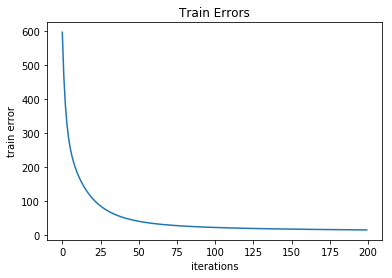

In [9]:
plt.plot(errors)
plt.title("Train Errors")
plt.xlabel("iterations")
plt.ylabel("train error")

In [10]:
for i in range(n_iter):
    beta = beta - alpha*np.dot(X_train_.T, np.dot(X_train_, beta)-y_train_)
beta

array([[-0.12621223],
       [ 0.19120062],
       [ 0.11547195],
       [ 0.07031294],
       [-0.28836922],
       [ 0.20656144],
       [ 0.05229535],
       [-0.40592114],
       [ 0.71178769],
       [-0.68519899],
       [-0.2293316 ],
       [ 0.07861674],
       [-0.46848045],
       [-0.24584462]])

('Gradient Descent Train Error', 13.057876881342661)

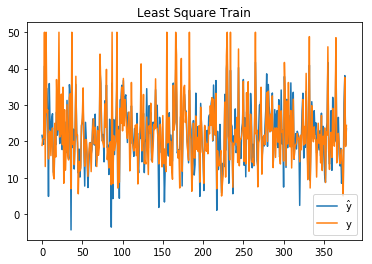

In [11]:
y_hat_train_ = np.dot(X_train_, beta)
y_hat_train = y_scale.inverse_transform(y_hat_train_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Least Square Train")
plt.legend()
train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
"Gradient Descent Train Error", train_error

('Gradient Descent Test Error', 9.759997537089172)

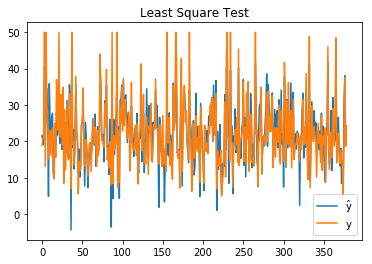

In [12]:
y_hat_test_ = np.dot(X_test_, beta)
y_hat_test = y_scale.inverse_transform(y_hat_test_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Least Square Test")
plt.legend()
test_error = np.sum(np.square(y_hat_test - y_test))/(2*y_test.shape[0])
"Gradient Descent Test Error", test_error